# Type II Project: Big Data Focused - Big Data Analytics

## (1) At least 10,000 records and multiple data files/tables.
## (2) stored using HDFS.

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Malware_Analysis').getOrCreate()

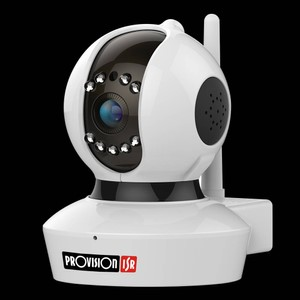

In [2]:
# Provision_PT_737E_Security_Camera, DeviceID: 5
# Benign traffic data
df_benign_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.benign.csv', header = True, inferSchema = True)
# Malicious traffic data
# Gafgyt malware
df_gafgyt_combo_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.gafgyt.combo.csv', header = True, inferSchema = True)
df_gafgyt_junk_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.gafgyt.junk.csv', header = True, inferSchema = True)
df_gafgyt_scan_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.gafgyt.scan.csv', header = True, inferSchema = True)
df_gafgyt_tcp_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.gafgyt.tcp.csv', header = True, inferSchema = True)
df_gafgyt_udp_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.gafgyt.udp.csv', header = True, inferSchema = True)
# Mirai malware
df_mirai_ack_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.mirai.ack.csv', header = True, inferSchema = True)
df_mirai_scan_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.mirai.scan.csv', header = True, inferSchema = True)
df_mirai_syn_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.mirai.syn.csv', header = True, inferSchema = True)
df_mirai_udp_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.mirai.udp.csv', header = True, inferSchema = True)
df_mirai_udpplain_5 = spark.read.csv('hdfs://namenode/malware_analysis_docs/5.mirai.udpplain.csv', header = True, inferSchema = True)

## (3) Data exploration and preprocessing

### 1. Data integration

#### Include a new column called "label binary" to distinguish between benign and malicious traffic data.

In [3]:
from pyspark.sql.functions import lit
# Add a new column named "label_binary"
# Benign traffic data
df_benign_5 = df_benign_5.withColumn("label_binary", lit("Benign"))
# Malicious traffic data
# Gafgyt malware
df_gafgyt_combo_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_gafgyt_junk_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_gafgyt_scan_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_gafgyt_tcp_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_gafgyt_udp_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
# Mirai malware
df_mirai_ack_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_mirai_scan_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_mirai_syn_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_mirai_udp_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))
df_mirai_udpplain_5 = df_benign_5.withColumn("label_binary", lit("Malicious"))

#### Include a new column called "label triclass" to categorize the traffic data into benign, BASHLITE and Mirai.

In [4]:
# Add a new column named "label_triclass"
# Benign traffic data
df_benign_5 = df_benign_5.withColumn("label_triclass", lit("Benign"))
# Malicious traffic data
# Gafgyt malware
df_gafgyt_combo_5 = df_gafgyt_combo_5.withColumn("label_triclass", lit("gafgyt"))
df_gafgyt_junk_5 = df_gafgyt_junk_5.withColumn("label_triclass", lit("gafgyt"))
df_gafgyt_scan_5 = df_gafgyt_scan_5.withColumn("label_triclass", lit("gafgyt"))
df_gafgyt_tcp_5 = df_gafgyt_tcp_5.withColumn("label_triclass", lit("gafgyt"))
df_gafgyt_udp_5 = df_gafgyt_udp_5.withColumn("label_triclass", lit("gafgyt"))
# Mirai malware
df_mirai_ack_5 = df_mirai_ack_5.withColumn("label_triclass", lit("mirai"))
df_mirai_scan_5 = df_mirai_scan_5.withColumn("label_triclass", lit("mirai"))
df_mirai_syn_5 = df_mirai_syn_5.withColumn("label_triclass", lit("mirai"))
df_mirai_udp_5 = df_mirai_udp_5.withColumn("label_triclass", lit("mirai"))
df_mirai_udpplain_5 = df_mirai_udpplain_5.withColumn("label_triclass", lit("mirai"))

#### Include a new column called "label multiclass" to categorize the traffic data into benign and the respective subtypes of BASHLITE and Mirai.

In [5]:
# Add a new column named "label_multiclass"
# Benign traffic data
df_benign_5 = df_benign_5.withColumn("label_multiclass", lit("Benign"))
# Malicious traffic data
# Gafgyt malware
df_gafgyt_combo_5 = df_gafgyt_combo_5.withColumn("label_multiclass", lit("gafgyt_combo"))
df_gafgyt_junk_5 = df_gafgyt_junk_5.withColumn("label_multiclass", lit("gafgyt_junk"))
df_gafgyt_scan_5 = df_gafgyt_scan_5.withColumn("label_multiclass", lit("gafgyt_scan"))
df_gafgyt_tcp_5 = df_gafgyt_tcp_5.withColumn("label_multiclass", lit("gafgyt_tcp"))
df_gafgyt_udp_5 = df_gafgyt_udp_5.withColumn("label_multiclass", lit("gafgyt_udp"))
# Mirai malware
df_mirai_ack_5 = df_mirai_ack_5.withColumn("label_multiclass", lit("mirai_ack"))
df_mirai_scan_5 = df_mirai_scan_5.withColumn("label_multiclass", lit("mirai_scan"))
df_mirai_syn_5 = df_mirai_syn_5.withColumn("label_multiclass", lit("mirai_syn"))
df_mirai_udp_5 = df_mirai_udp_5.withColumn("label_multiclass", lit("mirai_udp"))
df_mirai_udpplain_5 = df_mirai_udpplain_5.withColumn("label_multiclass", lit("mirai_udpplain"))

#### Combine all individual dataframes into a single, unified dataframe for the device.

In [6]:
# Union all DataFrames into one
df_device_5 = df_benign_5 \
            .union(df_gafgyt_combo_5) \
            .union(df_gafgyt_junk_5) \
            .union(df_gafgyt_scan_5) \
            .union(df_gafgyt_tcp_5) \
            .union(df_gafgyt_udp_5) \
            .union(df_mirai_ack_5) \
            .union(df_mirai_scan_5) \
            .union(df_mirai_syn_5) \
            .union(df_mirai_udp_5) \
            .union(df_mirai_udpplain_5)

### 2. Data Curation 

#### Understanding the data schema and its description.

In [7]:
df_device_5.printSchema()

root
 |-- MI_dir_L5_weight: double (nullable = true)
 |-- MI_dir_L5_mean: double (nullable = true)
 |-- MI_dir_L5_variance: double (nullable = true)
 |-- MI_dir_L3_weight: double (nullable = true)
 |-- MI_dir_L3_mean: double (nullable = true)
 |-- MI_dir_L3_variance: double (nullable = true)
 |-- MI_dir_L1_weight: double (nullable = true)
 |-- MI_dir_L1_mean: double (nullable = true)
 |-- MI_dir_L1_variance: double (nullable = true)
 |-- MI_dir_L0.1_weight: double (nullable = true)
 |-- MI_dir_L0.1_mean: double (nullable = true)
 |-- MI_dir_L0.1_variance: double (nullable = true)
 |-- MI_dir_L0.01_weight: double (nullable = true)
 |-- MI_dir_L0.01_mean: double (nullable = true)
 |-- MI_dir_L0.01_variance: double (nullable = true)
 |-- H_L5_weight: double (nullable = true)
 |-- H_L5_mean: double (nullable = true)
 |-- H_L5_variance: double (nullable = true)
 |-- H_L3_weight: double (nullable = true)
 |-- H_L3_mean: double (nullable = true)
 |-- H_L3_variance: double (nullable = true)
 |

#### Description:

    1.L5: Time-frame, how much recent history of the stream is capture in these statistics.
    
        1.1 MI DIR: 
            1.1.1 weight: the weight of the stream, viewed as the number of items observed in recent history.
            1.1.2 mean: the mean of the stream.
            1.1.3 variance: the variance of the stream.
            
        1.2 H: Stats summarizing the recent traffic from this packet's host (IP)
            |--The same as MI DIR
            
        1.3 HH jit: Stats summarizing the jitter of the traffic going from this packet's host (IP) to the packet's                                 destination host.
            |--The same as MI DIR
            
        1.4 HH: Stats summarizing the recent traffic going from this packet's host (IP) to the packet's destination host.
            1.4.1 weight: the weight of the stream, viewed as the number of items observed in recent history.
            1.4.2 mean: the mean of the stream.
            1.4.3 std: the variance of the stream.
            1.4.4 magnitude: the root squared sum of the two streams' means
            1.4.5 radius: the root squared sum of the two streams' variances
            1.4.6 covariance: an approximated covariance between two streams
            1.4.7 pcc: Pearson correlation coefficient between two streams.
            
        1.5 HpHp: Stats summarizing the recent traffic going from this packet's host+port (IP) to the packet's                                   destination host+port. Example 192.168.4.2:1242 -> 192.168.4.12:80
            |--The same as HH
            
    2.L3:
        |--The same as L5
    3.L1:
        |--The same as L5
    4.L0.1:
        |--The same as L5
    5.L0.01:
        |--The same as L5
        
Source: https://www.kaggle.com/datasets/mkashifn/nbaiot-dataset/data?select=features.csv

#### Replace "." with "_" in column names to prevent issues with certain analysis code.

In [8]:
# Format of columns names before replacing
df_device_5.columns[9]

'MI_dir_L0.1_weight'

In [9]:
for column_name in df_device_5.columns:
    new_column_name = column_name.replace('.', '_')
    df_device_5 = df_device_5.withColumnRenamed(column_name, new_column_name)

In [10]:
# Format of columns names after replacing
df_device_5.columns[9]

'MI_dir_L0_1_weight'

### 3. Data cleasing 

#### Initial summary statistics

In [11]:
df_device_5.select(df_device_5.columns).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
MI_dir_L5_weight,683694,7.952473200239978,13.24659371635511,1.0,55.54075311
MI_dir_L5_mean,683694,94.16328226456295,41.54894819072079,60.0,590.0
MI_dir_L5_variance,683694,10787.436625766963,21492.411526467033,0.0,410576.9132
MI_dir_L3_weight,683694,9.292613900390524,16.2049223594781,1.0,68.24243305
...,...,...,...,...,...
HpHp_L0_01_covariance,683694,3072.1925721812786,9293.500327344893,-37939.45235,44029.91409
HpHp_L0_01_pcc,683694,0.05438391443631428,0.18421679027426013,-0.9661269,1.022997072
label_binary,683694,None,None,Benign,Malicious
label_triclass,683694,None,None,Benign,mirai


#### Count of records with replicates.

In [12]:
from pyspark.sql.functions import col
df_device_5.groupBy(df_device_5.columns).count().filter(col("count") > 1).withColumnRenamed("count", "N° replicates").toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,32990,32991,32992,32993,32994,32995,32996,32997,32998,32999
MI_dir_L5_weight,1.03171,24.8375,1,1.99999,1.0342,1,1,2.00005,1.91183,1,...,1.00002,1,1,1.03292,1,1.00709,1,1.03452,4.94608,1.03202
MI_dir_L5_mean,60,183.228,60,60,60,60,60,89.9994,89.9995,90,...,60.0003,60,60,60,60,60,60,60,72.1305,60
MI_dir_L5_variance,9.26e-09,55222.1,0,4.55e-13,3.66e-05,4.55e-13,4.55e-13,0.0156895,0.0135602,0,...,0.00387131,0,3.62e-05,1.02e-08,0,7.76e-05,5.5e-11,0,216.765,4.36e-08
MI_dir_L3_weight,1.14148,28.4048,1,2,1.132,1.00004,1.00001,2.00713,1.95195,1,...,1.00171,1,1.00006,1.14503,1,1.0514,1.00006,1.14803,4.96877,1.14217
MI_dir_L3_mean,60,179.198,60,60,60.0015,60,60,89.9458,89.955,90,...,60.0238,60,60.0017,60,60,60.0026,60,60,72.0785,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HpHp_L0_01_pcc,0,0,0,5.43e-09,0,0,0,0.323806,0.05031,-0.112336,...,1.92e-17,0,5.4e-17,0,0,0,0,0,0.0277417,0
label_binary,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,...,Malicious,Malicious,Malicious,Malicious,Malicious,Malicious,Malicious,Malicious,Malicious,Malicious
label_triclass,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,...,mirai,mirai,mirai,mirai,mirai,mirai,mirai,mirai,mirai,mirai
label_multiclass,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,...,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain,mirai_udpplain


#### Explanation:
There are 32,999 records with duplicates, considering the numeric features, binary label, and label multiclass. Since we don't require data with repetitions, the following step will involve removing those duplicate entries.

In [13]:
# Remove duplicate entries
df_device_5 = df_device_5.dropDuplicates()

#### Examine the data to identify outliers

In [14]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import monotonically_increasing_id

def graph_boxplot(column_name, title):
    multiclass_name = ["gafgyt_combo", "gafgyt_junk", "gafgyt_scan", "gafgyt_tcp", "gafgyt_udp",
                   "mirai_ack", "mirai_scan", "mirai_syn", "mirai_udp", "mirai_udpplain"]

    df_plot = df_device_5.filter(df_device_5.label_multiclass == "Benign").select(column_name).withColumnRenamed(column_name, "Benign")

    for name in multiclass_name:
        df_union = df_device_5.filter(df_device_5.label_multiclass == name).select(column_name).withColumnRenamed(column_name, name)
        # Add a unique identifier to both DataFrames to join on
        dataframe1 = df_plot.withColumn("id", monotonically_increasing_id())
        dataframe2 = df_union.withColumn("id", monotonically_increasing_id())
        # Join the DataFrames on the common id
        df_plot = dataframe1.join(dataframe2, "id").drop("id")

    pandas_df = df_plot.toPandas()

    # Create box plots side by side
    plt.figure(figsize=(18, 6))
    pandas_df.boxplot(grid=True)

    # Set plot labels and title
    plt.title(title)

    # Show the plot
    plt.show()

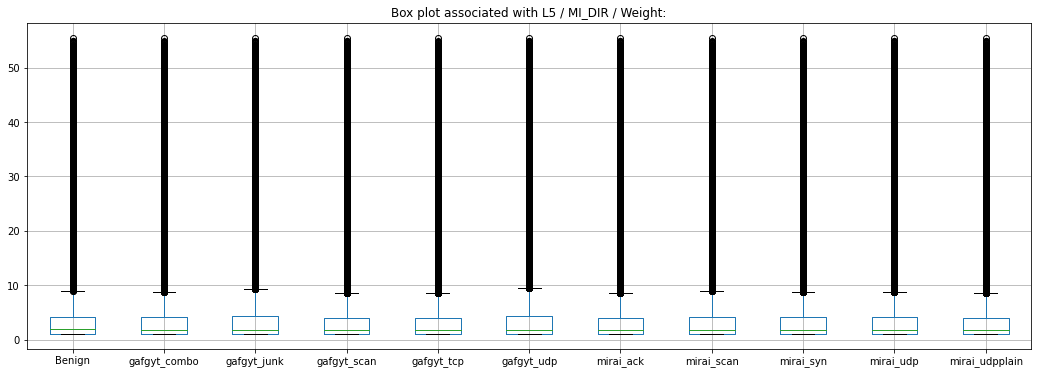

In [15]:
column_name = "MI_dir_L5_weight"
title = "Box plot associated with L5 / MI_DIR / Weight:"
graph_boxplot(column_name, title)

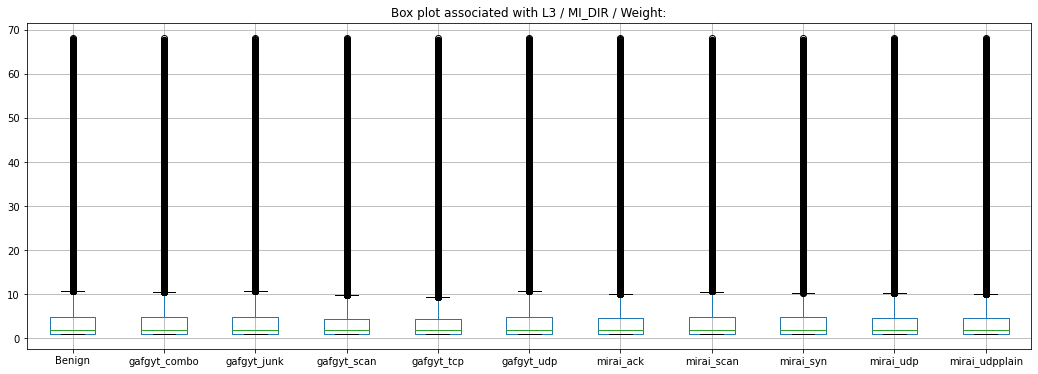

In [16]:
column_name = "MI_dir_L3_weight"
title = "Box plot associated with L3 / MI_DIR / Weight:"
graph_boxplot(column_name, title)

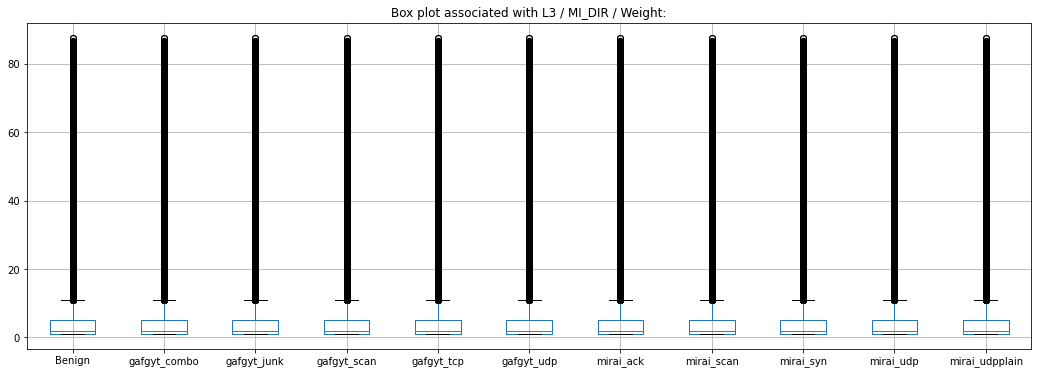

In [17]:
column_name = "MI_dir_L1_weight"
title = "Box plot associated with L3 / MI_DIR / Weight:"
graph_boxplot(column_name, title)

#### Explanation:
There are no isolated outliers in our observations. As a result, we will proceed with the analysis using the entire dataset, considering all traffic records.

Our analysis focused on the "MI_dir_weight" feature because it provides insights into the number of items observed in recent history. This feature is a robust indicator of consistency across different time frames.

### 4. Understanding data

#### Pandas dataframe show the first 5 records

In [18]:
import pandas as pd

pd.DataFrame(df_device_5.take(5), columns=df_device_5.columns).transpose()

,0,1,2,3,4
MI_dir_L5_weight,1,1.99684,3.5071,1.98541,2.00872
MI_dir_L5_mean,90,60,84.8488,60,89.8693
MI_dir_L5_variance,0,9.09e-13,128,2.4e-06,3.90419
MI_dir_L3_weight,1,1.9981,3.67944,1.99125,2.07684
MI_dir_L3_mean,90,60,83.9858,60.0002,88.8898
...,...,...,...,...,...
HpHp_L0_01_covariance,-0.477384,0.0457399,-0.108701,-5.57e-29,-0.687956
HpHp_L0_01_pcc,-0.12979,0.0230468,-0.0409795,0,-0.118263
label_binary,Benign,Benign,Benign,Benign,Benign
label_triclass,Benign,Benign,Benign,Benign,Benign


#### Assessment of classes balance.

In [19]:
df_device_5.groupby('label_binary').count().toPandas()

,label_binary,count
0,Malicious,551690
1,Benign,55169


#### Explanation:
The ratio of malicious to benign data is 10:1.

In [20]:
df_device_5.groupby('label_triclass').count().toPandas()

,label_triclass,count
0,mirai,275845
1,gafgyt,275845
2,Benign,55169


#### Explanation:
The ratio of gafgyt and mirai to benign data is 5:1

In [21]:
df_device_5.groupby('label_multiclass').count().toPandas()

,label_multiclass,count
0,gafgyt_scan,55169
1,mirai_ack,55169
2,Benign,55169
3,gafgyt_combo,55169
4,mirai_syn,55169
5,mirai_udp,55169
6,gafgyt_junk,55169
7,mirai_scan,55169
8,gafgyt_tcp,55169
9,mirai_udpplain,55169


#### Explanation:
The data distribution among classes is evenly balanced.

#### Summary statistics for numeric variables

In [22]:
numeric_features = [t[0] for t in df_device_5.dtypes if t[1] == 'double']
df_device_5.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
MI_dir_L5_weight,606859,7.928419420204029,13.240587582969619,1.0,55.54075311
MI_dir_L5_mean,606859,94.07671265948551,41.15149338481407,60.0,590.0
MI_dir_L5_variance,606859,10706.224373830386,21114.217561144855,0.0,410576.9132
MI_dir_L3_weight,606859,9.263241579686918,16.195890914808754,1.0,68.24243305
...,...,...,...,...,...
HpHp_L0_01_std,606859,41.79470390086391,92.6251256396963,0.0,417.6839434
HpHp_L0_01_magnitude,606859,128.342272201644,103.89836281017492,60.0,1470.0
HpHp_L0_01_radius,606859,17210.021570392793,51342.91451767696,0.0,418935.4362
HpHp_L0_01_covariance,606859,3064.5605233325164,9285.761061747311,-37939.45235,44029.91409


## (4A) Properly split the training set and testing set

### Preparing Data for Machine Learning
StringIndexer and VectorAssembler

In [23]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

stages = []

label_stringIdx = StringIndexer(inputCol = 'label_binary', outputCol = 'binary_label')
stages += [label_stringIdx]

label_stringIdx = StringIndexer(inputCol = 'label_triclass', outputCol = 'triclass_label')
stages += [label_stringIdx]

label_stringIdx = StringIndexer(inputCol = 'label_multiclass', outputCol = 'multiclass_label')
stages += [label_stringIdx]

assembler = VectorAssembler(inputCols = numeric_features, outputCol = "features")
stages += [assembler]

### Pipeline

In [24]:
from pyspark.ml import Pipeline

cols = df_device_5.columns

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_device_5)
df_device_5 = pipelineModel.transform(df_device_5)
selectedCols = ['binary_label', 'triclass_label', 'multiclass_label', 'features'] + cols
df_device_5 = df_device_5.select(selectedCols)

df_device_5.printSchema()

root
 |-- binary_label: double (nullable = false)
 |-- triclass_label: double (nullable = false)
 |-- multiclass_label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- MI_dir_L5_weight: double (nullable = true)
 |-- MI_dir_L5_mean: double (nullable = true)
 |-- MI_dir_L5_variance: double (nullable = true)
 |-- MI_dir_L3_weight: double (nullable = true)
 |-- MI_dir_L3_mean: double (nullable = true)
 |-- MI_dir_L3_variance: double (nullable = true)
 |-- MI_dir_L1_weight: double (nullable = true)
 |-- MI_dir_L1_mean: double (nullable = true)
 |-- MI_dir_L1_variance: double (nullable = true)
 |-- MI_dir_L0_1_weight: double (nullable = true)
 |-- MI_dir_L0_1_mean: double (nullable = true)
 |-- MI_dir_L0_1_variance: double (nullable = true)
 |-- MI_dir_L0_01_weight: double (nullable = true)
 |-- MI_dir_L0_01_mean: double (nullable = true)
 |-- MI_dir_L0_01_variance: double (nullable = true)
 |-- H_L5_weight: double (nullable = true)
 |-- H_L5_mean: double (nullable = t

In [25]:
import pandas as pd

# Calculate the fraction for sampling 5 rows
sample_fraction = 5 / df_device_5.count()

# Sample 5 random rows
df_device_5.sample(False, sample_fraction).toPandas().transpose()

,0,1,2,3,4,5
binary_label,0,0,0,0,0,0
triclass_label,1,1,1,0,0,1
multiclass_label,8,10,7,5,1,10
features,"[1.0305866, 60.0, 0.0, 1.138273907, 60.0, 1.5e...","[1.032202821, 60.0, 0.0, 1.142775986, 60.0, 4....","[1.032901231, 60.0, 4.55e-13, 1.143832556, 60....","[1.997393135, 90.0, 0.0, 1.998435065, 90.0, 9....","[3.998973917, 67.5019244, 168.7788623, 3.99938...","[1.013527886, 60.40039999, 11.85145627, 1.1178..."
MI_dir_L5_weight,1.03059,1.0322,1.0329,1.99739,3.99897,1.01353
...,...,...,...,...,...,...
HpHp_L0_01_covariance,0,0,0,-0.0636404,0.144729,-7.04e-30
HpHp_L0_01_pcc,0,0,0,-0.0230711,0.0322849,-8.94e-18
label_binary,Malicious,Malicious,Malicious,Malicious,Malicious,Malicious
label_triclass,mirai,mirai,mirai,gafgyt,gafgyt,mirai


### Randomly split data into train (70%) and test sets(30%)

#### Case1: training and testing data for label binary

In [26]:
df_benign = df_device_5.filter(df_device_5.label_binary == "Benign")
df_malicious = df_device_5.filter(df_device_5.label_binary == "Malicious")
malicious_sampling, malicious_extra = df_malicious.randomSplit([1/10, 9/10], seed = 2023)

df_device_sample = df_benign.union(malicious_sampling)

train_c1, test_c1 = df_device_sample.randomSplit([0.7, 0.3], seed = 2023)

train_count=train_c1.count()
test_count=test_c1.count()

print("Training Dataset Count: " + str(train_count))
print("Test Dataset Count: " + str(test_count))
print("Total Sampling Dataset Count: " + str(train_count + test_count))

Training Dataset Count: 77196
Test Dataset Count: 33468
Total Sampling Dataset Count: 110664


#### Case2: training and testing data for label triclass

In [27]:
df_benign = df_device_5.filter(df_device_5.label_triclass == "Benign")
df_gafgyt = df_device_5.filter(df_device_5.label_triclass == "gafgyt")
df_mirai = df_device_5.filter(df_device_5.label_triclass == "mirai")

gafgyt_sampling, gafgyt_extra = df_gafgyt.randomSplit([1/5, 4/5], seed = 2023)
mirai_sampling, mirai_extra = df_mirai.randomSplit([1/5, 4/5], seed = 2023)

df_device_sample = df_benign.union(gafgyt_sampling).union(mirai_sampling)

train_c2, test_c2 = df_device_sample.randomSplit([0.7, 0.3], seed = 2023)

train_count=train_c2.count()
test_count=test_c2.count()

print("Training Dataset Count: " + str(train_count))
print("Test Dataset Count: " + str(test_count))
print("Total Sampling Dataset Count: " + str(train_count + test_count))

Training Dataset Count: 116056
Test Dataset Count: 50182
Total Sampling Dataset Count: 166238


#### Case3: training and testing data for label multiclass

In [28]:
train_c3, test_c3 = df_device_5.randomSplit([0.7, 0.3], seed = 2023)

train_count=train_c3.count()
test_count=test_c3.count()

print("Training Dataset Count: " + str(train_count))
print("Test Dataset Count: " + str(test_count))
print("Total Sampling Dataset Count: " + str(train_count + test_count))

Training Dataset Count: 424477
Test Dataset Count: 182382
Total Sampling Dataset Count: 606859


## (4B) Machine learning algorithms using Spark

We will apply each machine learning algorithm with a specific goal in mind. Therefore, each algorithm will be used to address a pertinent question.

### Analytical tasks N°1: Logistic Regression Model

##### Question: Is it possible to forecast whether the traffic is benign or malicious?

#### We will use the spliting data for binary class

In [29]:
train = train_c1
test = test_c1

#### Build the logistic regression model

In [30]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'binary_label', maxIter=20)
lrModel = lr.fit(train)

##### Plot the coefficients by using Logistic Regression Model's attributes.

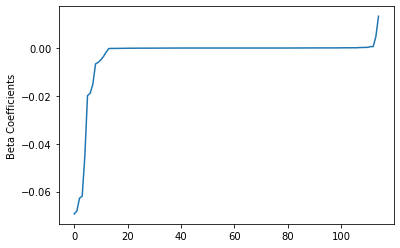

In [31]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

##### Explanation:
We notice that most features are insignificantly associated with the target variable, as indicated by their near-zero beta coefficients.

##### Plot the Receiver Operating Characteristic (ROC) and Area Under ROC

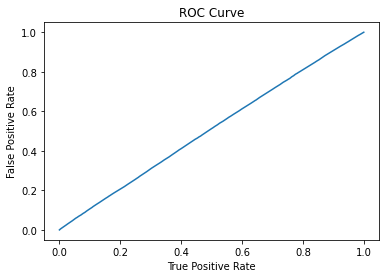

Trainning Area Under ROC: 0.5088985077245711


In [32]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Trainning Area Under ROC: ' + str(trainingSummary.areaUnderROC))

##### Explanation:

The model's ROC AUC score on the training data is approximately 0.5088. This score suggests that the model's ability to discriminate between the two classes is only slightly better than random guessing but is not highly effective in this particular evaluation metric.

##### Precision and Recall

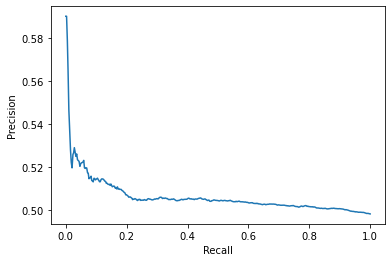

In [33]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#### Set the model threshold to maximize F-Measure

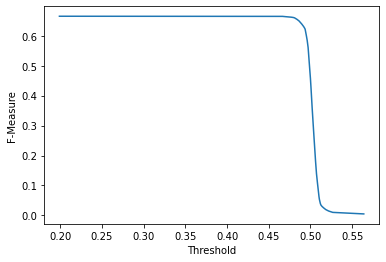

In [34]:
f = trainingSummary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'],f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()

### Model evaluation on the testing set N°1

##### Outcome visualization - table

In [35]:
predictions = lrModel.transform(test)
predictions.select('features', 'binary_label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+------------+--------------------+----------+--------------------+
|            features|binary_label|       rawPrediction|prediction|         probability|
+--------------------+------------+--------------------+----------+--------------------+
|(115,[0,1,3,4,6,7...|         1.0|[-0.0374263351548...|       1.0|[0.49064450822940...|
|[1.0,60.0,0.0,1.0...|         1.0|[-0.0722588015567...|       1.0|[0.48194315566240...|
|[1.0,60.0,4.55E-1...|         1.0|[-0.0039567073407...|       1.0|[0.49901082445531...|
|[1.0,73.0,0.0,1.0...|         1.0|[-0.0179913739858...|       1.0|[0.49550227782501...|
|[1.0,90.0,0.0,1.0...|         1.0|[0.01005926144755...|       0.0|[0.50251479415618...|
|[1.0,90.0,0.0,1.0...|         1.0|[9.42565219810908...|       0.0|[0.50023564128750...|
|[1.0,90.0,0.0,1.0...|         1.0|[0.01074891913439...|       0.0|[0.50268720391051...|
|[1.0,90.0,0.0,1.0...|         1.0|[0.00805855344240...|       0.0|[0.50201462745807...|
|[1.0,90.0,0.0,1.0...

##### Outcome visualization - graph
##### Calculate and plot predictive accuracies of each binary class, using a bar graph

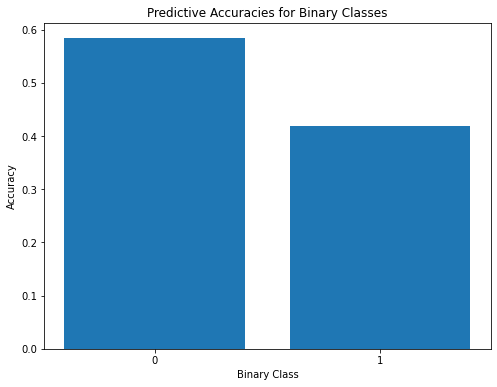

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

total = predictions.groupby('binary_label').agg({'binary_label': 'count'})
total = total.withColumnRenamed('count(binary_label)', 'count_total')
partial = predictions.filter(col('binary_label') == col('prediction')).groupby('binary_label').agg({'binary_label': 'count'})
partial = partial.withColumnRenamed('count(binary_label)', 'count_partial')

# Join the partial and total DataFrames on 'binary_label'
accuracies = partial.join(total, on='binary_label')

# Calculate the accuracy by dividing count_partial by count_total
accuracies = accuracies.withColumn('accuracy', accuracies['count_partial'] / accuracies['count_total'])

# Convert to a Pandas DataFrame for easier plotting
accuracies_pd = accuracies.toPandas()

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies_pd['binary_label'], accuracies_pd['accuracy'])
plt.xlabel('Binary Class')
plt.ylabel('Accuracy')
plt.title('Predictive Accuracies for Binary Classes')
plt.xticks(accuracies_pd['binary_label'])
plt.show()

#### Explanation:
The visualization of the results indicates that both binary classes have a low probability of accurately distinguishing between a benign and a malicious data stream.

In [37]:
accuracies_pd

,binary_label,count_partial,count_total,accuracy
0,0.0,9791,16762,0.584119
1,1.0,6997,16706,0.418832


#### Evaluate our Logistic Regression model using the predictions

In [38]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="binary_label")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.5007534283284266


#### Explanation:
The AUC-ROC score of 0.5007 suggests that the binary classification model's performance is very close to random guessing and does not effectively discriminate between the positive and negative classes.

### Analytical tasks N°2: Random Forest Classifier

##### Question: Is it possible to forecast whether the traffic is benign, gafgyt or mirai?

#### We will use the spliting data for triclass

In [39]:
train = train_c2
test = test_c2

#### Build the Random Forest Classifier

In [40]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'triclass_label')
rfModel = rf.fit(train)

#### Calculate the Area Under ROC

In [41]:
train_predictions = rfModel.transform(train)
evaluator = BinaryClassificationEvaluator(labelCol="triclass_label")
print("Test Area Under ROC: " + str(evaluator.evaluate(train_predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5198678908003074


##### Explanation:

The model's ROC AUC score on the training data is approximately 0.5198. This score suggests that the model's ability to discriminate between the three classes is worse than random guessing.

### Model evaluation on the testing set N°2

##### Outcome visualization - table

In [42]:
predictions = rfModel.transform(test)
predictions.select('features', 'triclass_label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+--------------+--------------------+----------+--------------------+
|            features|triclass_label|       rawPrediction|prediction|         probability|
+--------------------+--------------+--------------------+----------+--------------------+
|(115,[0,1,3,4,6,7...|           2.0|[6.77571447729283...|       0.0|[0.33878572386464...|
|[1.0,60.0,0.0,1.0...|           2.0|[6.82066096564065...|       0.0|[0.34103304828203...|
|[1.0,60.0,4.55E-1...|           2.0|[6.77370912449405...|       0.0|[0.33868545622470...|
|[1.0,73.0,0.0,1.0...|           2.0|[6.59245905228038...|       1.0|[0.32962295261401...|
|[1.0,90.0,0.0,1.0...|           2.0|[6.71868853649045...|       0.0|[0.33593442682452...|
|[1.0,90.0,0.0,1.0...|           2.0|[6.65810878375344...|       2.0|[0.33290543918767...|
|[1.0,90.0,0.0,1.0...|           2.0|[6.65250701255882...|       2.0|[0.33262535062794...|
|[1.0,90.0,0.0,1.0...|           2.0|[6.67370993997997...|       0.0|[0.33368549699899...|

##### Calculate and plot predictive accuracies of each of the three classes, using a bar graph

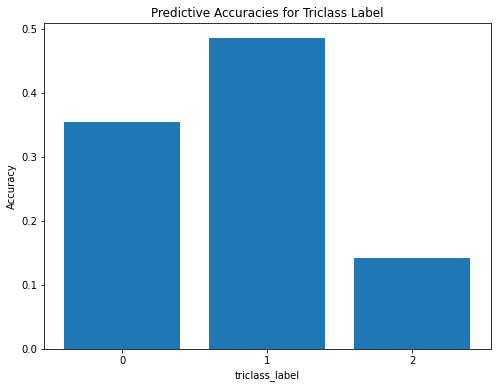

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

total = predictions.groupby('triclass_label').agg({'triclass_label': 'count'})
total = total.withColumnRenamed('count(triclass_label)', 'count_total')
partial = predictions.filter(col('triclass_label') == col('prediction')).groupby('triclass_label').agg({'triclass_label': 'count'})
partial = partial.withColumnRenamed('count(triclass_label)', 'count_partial')

# Join the partial and total DataFrames on 'binary_label'
accuracies = partial.join(total, on='triclass_label')

# Calculate the accuracy by dividing count_partial by count_total
accuracies = accuracies.withColumn('accuracy', accuracies['count_partial'] / accuracies['count_total'])

# Convert to a Pandas DataFrame for easier plotting
accuracies_pd = accuracies.toPandas()

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies_pd['triclass_label'], accuracies_pd['accuracy'])
plt.xlabel('triclass_label')
plt.ylabel('Accuracy')
plt.title('Predictive Accuracies for Triclass Label')
plt.xticks(accuracies_pd['triclass_label'])
plt.show()

#### Explanation:
The visualization of the results indicates that each one of the three classes have a low probability of accurately distinguishing between a benign, BASHLITE and Mirai atack.

#### Calculate the Area Under ROC

In [44]:
evaluator = BinaryClassificationEvaluator(labelCol="triclass_label")
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5018579768600527


#### Explanation:
The AUC-ROC score of 0.5018 suggests that the tri-classes classification model's performance is very close to random guessing and does not effectively discriminate between the different classses.

### Analytical tasks N°3: Multilayer Perceptron Classifier

##### Question: Is it possible to forecast whether the traffic is benign, gafgyt's subtype or mirai's subtype?

#### We will use the spliting data for multiclass

In [45]:
train = train_c3
test = test_c3

#### Build the Multilayer Perceptron Classifier

In [46]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

layers = [115, 16, 11] # 115 inputs layers, 16 hidden layers, 11 output layers

mlp = MultilayerPerceptronClassifier(layers=layers, featuresCol='features', labelCol='multiclass_label')

mlp_model = mlp.fit(train)

#### Evaluate the accuracy

In [47]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Make predictions on your train data and evaluate
train_predictions = mlp_model.transform(train)

evaluator = MulticlassClassificationEvaluator(labelCol='multiclass_label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(train_predictions)

print('Train Accuracy:', accuracy)

Train Accuracy: 0.09096841524982507


#### Explanation:

The accuracy observed implies that the current model, with 115 input layers, 16 hidden layers, and 11 output layers, is unable to effectively predict the dataset labeled with multiclass instances.

### Model evaluation on the testing set N°3

##### Outcome visualization - table

In [48]:
# Make predictions on your test data
predictions = mlp_model.transform(test)

In [49]:
predictions.select('features', 'multiclass_label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+----------------+--------------------+----------+--------------------+
|            features|multiclass_label|       rawPrediction|prediction|         probability|
+--------------------+----------------+--------------------+----------+--------------------+
|(115,[0,1,3,4,5,6...|             1.0|[0.18946653164916...|       7.0|[0.08456422671534...|
|(115,[0,1,3,4,6,7...|             1.0|[0.27255650354261...|       0.0|[0.10021610327137...|
|[1.0,60.0,0.0,1.0...|             1.0|[0.27255650354261...|       0.0|[0.10021610327137...|
|[1.0,73.0,0.0,1.0...|             1.0|[0.11030147257336...|      10.0|[0.09289531546881...|
|[1.0,73.0,0.0,1.0...|             1.0|[0.11030147257336...|      10.0|[0.09289531546881...|
|[1.0,73.0,0.0,1.0...|             1.0|[0.11030147257336...|      10.0|[0.09289531546881...|
|[1.0,90.0,0.0,1.0...|             1.0|[0.25047927126439...|       0.0|[0.09585790606622...|
|[1.0,90.0,0.0,1.0...|             1.0|[0.27255650354261...|       0.0

##### Calculate and plot predictive accuracies of each of the eleven classes, using a bar graph

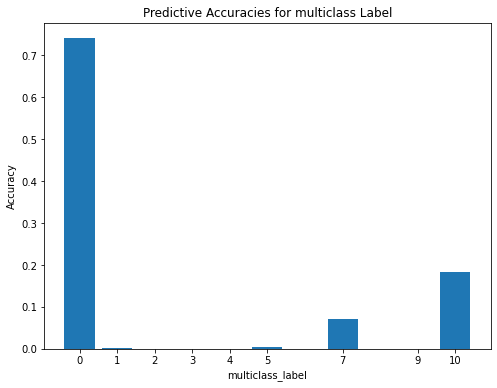

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

total = predictions.groupby('multiclass_label').agg({'multiclass_label': 'count'})
total = total.withColumnRenamed('count(multiclass_label)', 'count_total')
partial = predictions.filter(col('multiclass_label') == col('prediction')).groupby('multiclass_label').agg({'multiclass_label': 'count'})
partial = partial.withColumnRenamed('count(multiclass_label)', 'count_partial')

# Join the partial and total DataFrames on 'binary_label'
accuracies = partial.join(total, on='multiclass_label')

# Optionally, calculate the accuracy by dividing count_partial by count_total
accuracies = accuracies.withColumn('accuracy', accuracies['count_partial'] / accuracies['count_total'])

# Convert to a Pandas DataFrame for easier plotting
accuracies_pd = accuracies.toPandas()

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies_pd['multiclass_label'], accuracies_pd['accuracy'])
plt.xlabel('multiclass_label')
plt.ylabel('Accuracy')
plt.title('Predictive Accuracies for multiclass Label')
plt.xticks(accuracies_pd['multiclass_label'])
plt.show()

#### Perform the Multiclass Classification Evaluator

In [51]:
evaluator = MulticlassClassificationEvaluator(labelCol='multiclass_label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

print('Test Accuracy:', accuracy)

Test Accuracy: 0.09077101906986434


#### Explanation:

The accuracy observed implies that the current model, with 115 input layers, 16 hidden layers, and 11 output layers, is unable to effectively predict the dataset labeled with multiclass instances.

### Analytical tasks N°4: Clustering

##### Question: Is there a real difference between the benign, BASHLITE and Mirai? 
I will address this question by performing clustering with K=3 to identify distinct clusters.

#### Perform PCA

In [52]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# Create a PCA instance, specifying the number of desired components
num_components = 2  # Components to be plot in 2D
pca = PCA(k=num_components, inputCol="features", outputCol="pca_features")

# Fit and transform the data
model = pca.fit(df_device_5)
df_device_5 = model.transform(df_device_5)

In [53]:
# Show the DataFrame with the new "pca_features" column
df_device_5.select("pca_features").toPandas()

,pca_features
0,"[6513856700174081.0, -5460220255346457.0]"
1,"[2495407749984.9453, -2091767837205.4321]"
2,"[402779424867.44867, -337628608569.06213]"
3,"[215448250.37898183, -180598673.78784356]"
4,"[468670300.7494242, -392861431.70144653]"
...,...
606854,"[123.91167463305095, -69.07517311090231]"
606855,"[81.2802347808719, -51.553335181699936]"
606856,"[60.64263469000508, -39.53837661736698]"
606857,"[33.394433347441186, -27.95429575972992]"


#### Build the Clustering

In [54]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(featuresCol = 'pca_features', k=3, predictionCol='prediction')
model = kmeans.fit(df_device_5)
df_device_5 = model.transform(df_device_5)
centroids = model.clusterCenters()

# We get 3 clusters
centroids

[array([ 3.99391635e+14, -3.07799930e+14]),
 array([8.40730447e+17, 1.77652178e+17]),
 array([ 3.32854227e+17, -1.36323473e+17])]

### Model evaluation on the dataset N°4

#### Post-processing

In [55]:
# This post-processing is a step to plot 
l = []
for centroid in centroids:
    l.append((centroid[0],centroid[1]))
print(l)

[(399391635366531.6, -307799930365853.6), (8.407304468354042e+17, 1.7765217839802368e+17), (3.328542274111e+17, -1.363234727294233e+17)]


#### Plotting the position of each data records in a 2d plane

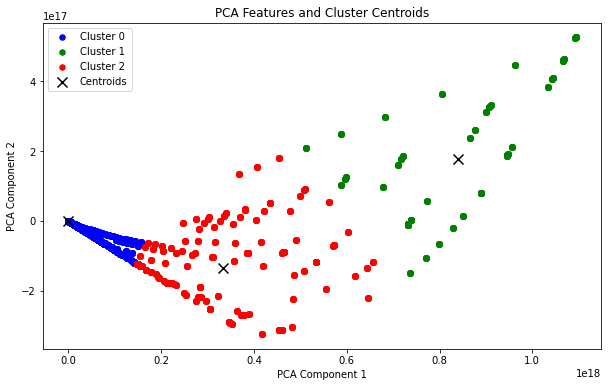

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Spark DataFrame to a Pandas DataFrame
df_pandas = df_device_5.select("pca_features", "prediction").toPandas()

# Extract PCA features and cluster predictions
pca_features = list(df_pandas["pca_features"])
predictions = list(df_pandas["prediction"])

# Extract x and y coordinates from pca_features
pca_x, pca_y = zip(*pca_features)

# Create a scatter plot for PCA features with different colors for each cluster
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(max(predictions) + 1):
    cluster_x = [pca_x[j] for j in range(len(pca_x)) if predictions[j] == i]
    cluster_y = [pca_y[j] for j in range(len(pca_y)) if predictions[j] == i]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {i}', c=colors[i], s=30)

# Plot cluster centroids
centroid_x, centroid_y = zip(*l)
plt.scatter(centroid_x, centroid_y, marker='x', c='black', s=100, label='Centroids')

# Label the plot
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Features and Cluster Centroids")

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Explanation:
It is evident that there are three distinguishable clusters, primarily differentiated by the shape of their respective regions.

## Final report:
In my project, I delved into an analysis of the various levels of granularity associated with malware, particularly those that contribute to IoT Botnet Attacks. The main objective was to identify which granularity level could enhance our ability to discern between benign and malicious IoT network traffic.

The conclusive findings indicated that achieving a high degree of accuracy in distinguishing benign from malicious traffic proved to be unattainable. This conclusion was substantiated through the application of binary regression, random forest decision trees, and the Multilayer Perceptron Classifier.

Furthermore, our clustering analysis unveiled the presence of three distinct data clusters. In future research pursuits, I recommend conducting an in-depth exploration of this approach to gain a better understanding of the unique characteristics of each cluster. This exploration aims to help us determine whether there are significant distinctions between benign traffic, BASHLITE, and Mirai data.